In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import sympy as sy

In [2]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

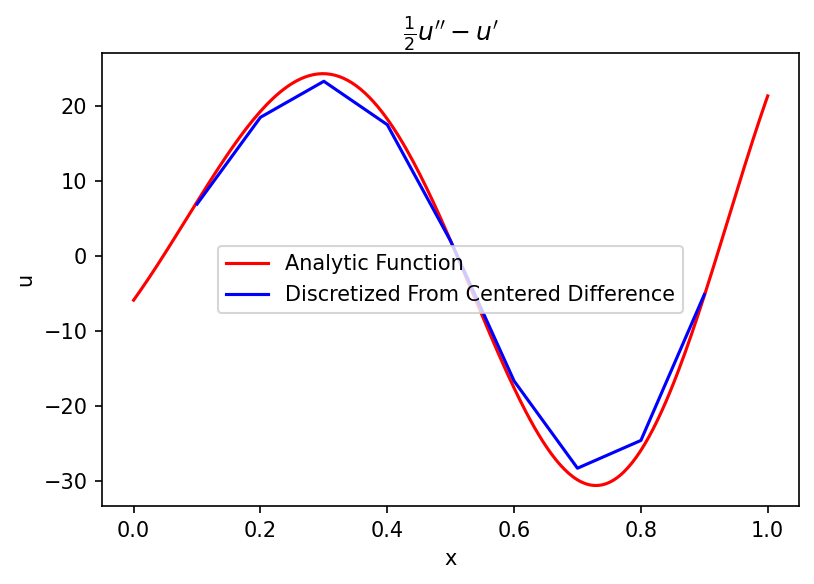

In [3]:
def centered_dif_1st( f, a, b, n=10, method = 1 ):
    ''' Approxmiates the 1st derivative with a centered finite difference method
        Parameters:
            f (function): the function to approximate the first derivative of
            a (float): the start point of the interval
            b (float): the end ponit of the interval
            n (float): the number of steps to take
            method (int, str): the method to use or test
        Returns:
            x_vals ((n,) np.ndarray): the discretized spatial points
            up_vals ((n,) np.ndarray): the discretized approximate derivative values
    '''
    #get x_vals as the evaluation points and the step size h
    x_vals = np.linspace(a, b, n+1)
    h = (b-a)/n
    #first method
    if method == 1:
        #initialize tridiagonal matrix
        tri_diagonal_matrix = np.zeros((n-1, n+1))
        for i in range(n-1):
            tri_diagonal_matrix[i, i+2] =1
            tri_diagonal_matrix[i, i] = -1
        #scale it
        tri_diagonal_matrix /= (2*h)
        #get the u vector
        u_vec = f(x_vals)
        #get the discretized derivative values
        up_vals = tri_diagonal_matrix @ u_vec

    #second method
    elif method == 2:
        #initialize tridiagonal matrix
        tri_diagonal_matrix_1 = np.diag(np.ones(n-2), k=1)
        tri_diagonal_matrix_2 = np.diag(-1*np.ones(n-2), k=-1)
        tri_diagonal_matrix = tri_diagonal_matrix_1 + tri_diagonal_matrix_2 
        tri_diagonal_matrix /= 2*h

        #get first function evaluation vector 
        u_vec = f(x_vals[1:-1])
        #initialize the scaled function vector
        u_vec_scaled = np.zeros_like(u_vec)
        #set the end points
        u_vec_scaled[0] = -f(x_vals[0]) / (2*h)
        u_vec_scaled[-1] = f(x_vals[-1]) / (2*h)

        #get the discretize derivative values
        up_vals = tri_diagonal_matrix @ u_vec + u_vec_scaled

    #used for testing 
    elif method == 'test':
        x_vals_1, up_vals_1 = centered_dif_1st( f, a, b, n=n, method=1 )
        x_vals_2, up_vals_2 = centered_dif_1st( f, a, b, n=n, method=2 )
        assert np.allclose(x_vals_1, x_vals_2)
        assert np.allclose(up_vals_1, up_vals_2)
        return True

    else:
        raise NotImplementedError

    #return discretized values (notice no endpoints) 
    return x_vals[1:-1], up_vals

def centered_dif_2nd( f, a, b, n=10, method = 1 ):
    ''' Approxmiates the 2nd derivative with a centered finite difference method
        Parameters:
            f (function): the function to approximate the first derivative of
            a (float): the start point of the interval
            b (float): the end ponit of the interval
            n (float): the number of steps to take
            method (int, str): the method to use or test
        Returns:
            x_vals ((n,) np.ndarray): the discretized spatial points
            upp_vals ((n,) np.ndarray): the discretized approximate  2nd_derivative values
    '''
    x_vals = np.linspace(a, b, n+1)
    h = (b-a)/ n

    if method == 1:
        #initialize tridiagonal matrix
        tri_diagonal_matrix = np.zeros((n-1, n+1))
        #set correct values
        for i in range(n-1):
            tri_diagonal_matrix[i, i+2] = 1
            tri_diagonal_matrix[i, i] = 1
            tri_diagonal_matrix[i, i+1] = -2

        #scale the matrix
        tri_diagonal_matrix /= h**2
        #get u_vec
        u_vec = f(x_vals)
        #create the discretized values
        upp_vals = tri_diagonal_matrix @ u_vec

    elif method == 2:
        #initialize tridiagonal matrix
        tri_diagonal_matrix_1 = np.diag(-2*np.ones(n-1), k=0)
        tri_diagonal_matrix_2 = np.diag(np.ones(n-2), k=-1)
        tri_diagonal_matrix_3 = np.diag(np.ones(n-2), k=1)
        tri_diagonal_matrix = tri_diagonal_matrix_1 + tri_diagonal_matrix_2 + tri_diagonal_matrix_3
        tri_diagonal_matrix /= h**2

        #get first u vector
        u_vec = f(x_vals[1:-1])
        #get second u vector
        u_vec_scaled = np.zeros_like(u_vec)
        u_vec_scaled[0] = f(x_vals[0]) / (h**2)
        u_vec_scaled[-1] = f(x_vals[-1]) / (h**2)

        #create the discretized values 
        upp_vals = tri_diagonal_matrix @ u_vec + u_vec_scaled


    elif method == 'test':
        x_vals_1, upp_vals_1 = centered_dif_2nd( f, a, b, n=n, method=1 )
        x_vals_2, upp_vals_2 = centered_dif_2nd( f, a, b, n=n, method=2 )
        assert np.allclose(x_vals_1, x_vals_2)
        assert np.allclose(upp_vals_1, upp_vals_2)
        return True

    else:
        raise NotImplementedError

    #return discretized values (notice no endpoints) 
    return x_vals[1:-1], upp_vals

def prob1():

    func = lambda x : np.sin((x + np.pi)**2 - 1)
    a = 0 
    b = 1
    n = 10
    #run tests
    centered_dif_1st( func, a, b, n=n, method='test' )
    centered_dif_2nd( func, a, b, n=n, method='test' )
    #get analytic solution
    x = sy.symbols( 'x' )
    expr = sy.sin((x + sy.pi)**2 -1)
    deriv_1 = sy.diff(expr, x)
    deriv_2 = sy.diff(deriv_1, x)
    final = sy.Rational(1, 2) * deriv_2 - deriv_1
    final = sy.simplify(final)
    analytic = sy.lambdify(x, final)

    domain = np.linspace(a, b, 300)
    x_vals, up_vals = centered_dif_1st( func, a, b, n=n, method=2 )
    _, upp_vals = centered_dif_2nd( func, a, b, n=n, method=2 )
    final_vals = ( 1/2. ) * upp_vals - up_vals

    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(domain, analytic(domain), 'r-', label='Analytic Function')
    ax.plot(x_vals, final_vals, 'b-', label='Discretized From Centered Difference')
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.set_title(r"$\frac{1}{2} u'' - u'$")
    plt.show()



prob1()

# Problem 2

Equation (1.7) is the singularly perturbed boundary value problem
\begin{align*}
	&{ } \varepsilon u''(x)-u(x)'= f(x), \quad x \in (0,1), \\
	&{ } u(0) = \alpha, \quad u(1) = \beta.
\end{align*}

Use equation (1.9) to solve the singularly perturbed BVP (1.7) on $[0,1]$ with $\varepsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\varepsilon$. For $\varepsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

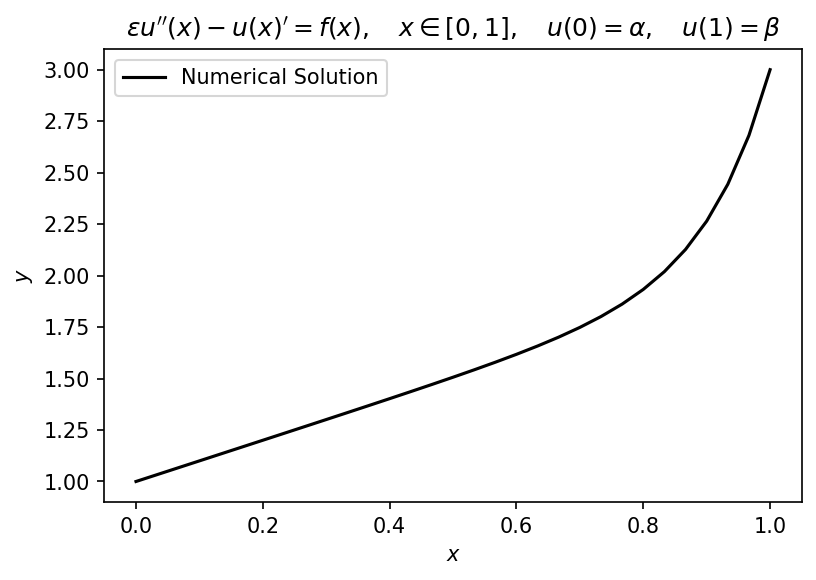

In [4]:
def singular_bvp_1(domain, eps,alpha,beta,f,n):
    """
    Solves the singularly perturbed BVP (1.7) on the interval [0,1] using finite differences.
    
    Parameters:
        domain (list, np.ndarray): the domain for the problem to be solved on
        eps (float): the singular perturbation parameter of the BVP.
        alpha (float): the boundary value of u at x=0.
        beta (float): the boundary value of u at x=1.
        f (callable): the right-hand function of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        x_vals ((n+1, ) np.ndarray): the discretized x values on the domain
        u_vals ((n+1, ) np.ndarray): the approximated solution to the BVP, including the boundary points.
    """

    x_vals = np.linspace(domain[0], domain[-1], n+1)
    h = (domain[-1]-domain[0])/n

    matrix_diag = np.diag(-2*eps*np.ones(n-1), k = 0)
    matrix_upper_diag = np.diag((eps - h/2) * np.ones(n-2), k=1)
    matrix_lower_diag = np.diag((eps+h/2)*np.ones(n-2), k=-1)

    matrix = matrix_diag + matrix_upper_diag + matrix_lower_diag

    matrix /= (h**2)

    f_vec = np.zeros(n-1)
    f_vec[1:-1] = f(x_vals[2:-2])
    f_vec[0] = f(x_vals[1]) - alpha * (eps + h/2) / h**2
    f_vec[-1] = f(x_vals[-2]) - beta * (eps - h/2) / h**2

    u_vec = la.solve(matrix, f_vec)

    u_vals = np.empty(n+1)
    u_vals[0] = alpha
    u_vals[-1] = beta
    u_vals[1:-1] = u_vec

    return x_vals, u_vals


def prob2():
    domain = [0, 1]
    eps = 1/10.
    alpha = 1
    beta = 3
    func = lambda x: -(x**0)
    n = 30
    x_vals, u_vals = singular_bvp_1(domain, eps, alpha, beta, func, n)
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(x_vals, u_vals, 'k-', label=r'Numerical Solution')
    ax.legend(loc='best')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r"$\varepsilon u''(x) - u(x)' = f(x),\quad x\in[0, 1],\quad u(0) = \alpha,\quad u(1) = \beta$")
    plt.show()

    return

prob2()

# Problem 3

Implement a function `singular_bvp` to compute the finite difference solution to (1.7).
Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.
Use these to visualize the $\mathcal{O}(h^2)$ convergence of the finite difference method from Problem 2 by producing a loglog plot of error against subinterval count; this will be similar to Figure 2, except with $\varepsilon=0.1$. 

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. ote that, since the ratios of numbers of subintervals between approximations are multiples of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation; the vector has length 5*2^9+1
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals; the vector has length 5*2^j+1
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error; slicing results in a vector of length 5*2^j+1,
    #    which allows it to be compared
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


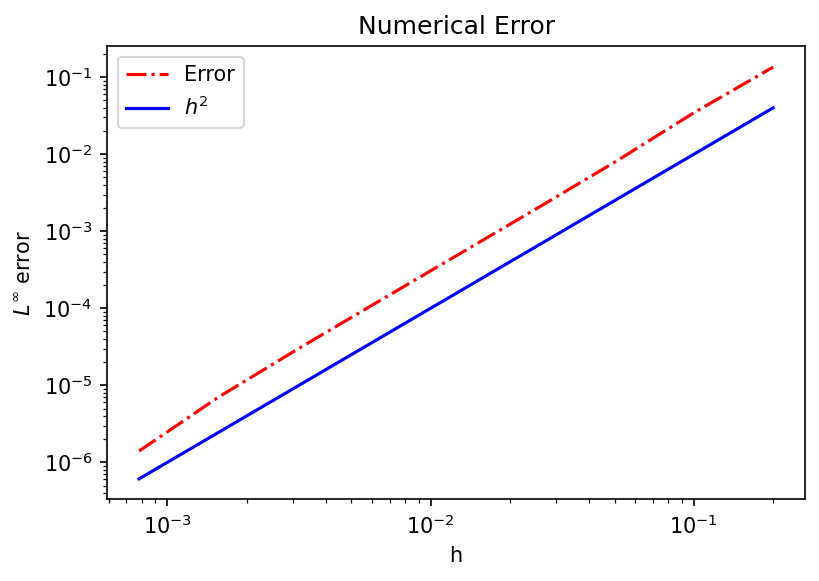

In [5]:
def singular_bvp(domain, eps,alpha,beta,f,n):
    """
    Solves the singularly perturbed BVP (1.7) on the interval [0,1] using finite differences.
    
    Parameters:
        domain (list, np.ndarray): the domain for the problem to be solved on
        eps (float): the singular perturbation parameter of the BVP.
        alpha (float): the boundary value of u at x=0.
        beta (float): the boundary value of u at x=1.
        f (callable): the right-hand function of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        x_vals ((n+1, ) np.ndarray): the discretized x values on the domain
        u_vals ((n+1, ) np.ndarray): the approximated solution to the BVP, including the boundary points.
    """
    #just use the function we already wrote
    return singular_bvp_1(domain, eps, alpha, beta, f, n)

def prob3():
    #set up problem
    domain = [0, 1]
    eps = 1/10.
    alpha = 1
    beta = 3
    func = lambda x: -(x**0)
    #get apprpriate step number and step size
    n_vals = 5*np.logspace(0,10, base=2, num=10, endpoint=False)[::-1].astype(np.int64)
    h_vals = (domain[-1] - domain[0])/n_vals
    #now iterate through and get L_infty error
    Error = []
    for i, n in enumerate(n_vals):
        if i == 0:
            _, true_sol = singular_bvp_1(domain, eps, alpha, beta, func, n)
        else:
            _, approx_sol = singular_bvp_1(domain, eps, alpha, beta, func, n)
            curr_error = np.max(np.abs(approx_sol - true_sol[::int(2**(i))]))
            Error.append(curr_error)
    #plot the error on a logplot
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.loglog(h_vals[1:], Error, 'r-.', label='Error' )
    ax.loglog(h_vals[1:], h_vals[1:]**2, 'b-', label=r'$h^2$')
    ax.legend(loc='best')
    ax.set_xlabel('h')
    ax.set_ylabel(r'$L^\infty$ error')
    ax.set_title('Numerical Error')
    plt.show()

    return

prob3()

# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y''(x) +a_2(x)y'(x)+ a_3(x) y(x) = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\varepsilon y'(x) - 4(\pi - x^2)y(x) = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\varepsilon = 0.1$ on a grid with $n=30$ subintervals. Plot your solution.
Again we can use our discretized matrix solution to do this. Going through the finite centered difference we get the following matrix. Again let $Y_i = y(x_i)$ and we get the update
\begin{align*}
\frac{a_1}{h^2}(Y_{i+1}-2Y_i + Y_{i-1}) + \frac{a_2}{2h}(Y_{i+1}-Y_{i-1}) + a_3 Y_i = f(x_i), \, i=1, \ldots, n-1
\end{align*}
where $Y_0 = \alpha$ and $Y_n = \beta$. This gives the following matrix equation
\begin{align*}
\frac{1}{h^2}
\begin{bmatrix}
h^2 & 0 & 0 & \ldots & 0\\
a_1 - a_2h/2 & -2a_1 + a_3h^2& a_1 +a_2 h/2 & \cdots & 0\\
\vdots & &\ddots & & \vdots\\
0 & \cdots & a_1 - a_2h/2 & -2a_1 + a_3h2 & a_1 + a_2h/2\\
0 & \cdots &\cdots & 0 & h^2
\end{bmatrix}
\begin{bmatrix}
Y_0\\Y_1\\\vdots\\ Y_{n-1}\\Y_n
\end{bmatrix}
=
\begin{bmatrix}
\alpha\\
f(x_1)\\
\vdots\\
f(x_{n-1})\\
\beta
\end{bmatrix}
\end{align*}
as beore we can get the tridiagonal system by removing two equations
\begin{align*}
\frac{1}{h^2}
\begin{bmatrix}
-2a_1 +a_3h^2 & a_1 + a_2h/2 & 0 & \cdots & 0\\
a_1 - a_2h/2 & -2a_1 +a_3h^2 &a_1 + a_2h/2 & \cdots & 0\\
\vdots & & \ddots & & \vdots\\
0 & \cdots & a_1 - a_2h/2 & -2a_1 +a_3h^2 &a_1 +  a_2h/2\\
0 & \cdots & 0 & a_1 - a_2h/2 &-2a_1 +a_3h^2
\end{bmatrix}
\begin{bmatrix}
Y_1 \\Y_2\\\vdots\\Y_{n-2}\\Y_{n-1}
\end{bmatrix}
&=
\begin{bmatrix}
f(x_1) - \alpha(a_1-a_2h/2)/h^2\\
f(x_2)\\
\vdots\\
f(x_{n-2})\\
f(x_{n-1})-\beta(a_1 + a_2h/2)/h^2
\end{bmatrix}
\end{align*}

In [6]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """
    Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
    using finite differences.
    
    Parameters:
        a, b (float): the left and right boundary points.
        alpha (float): the boundary value of y at x=a.
        beta (float): the boundary value of y at x=b.
        f (callable): the right-hand function of the BVP.
        a1, a2, a3 (callable): the coefficient functions of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        x_vals ((n+1, ) np.ndarray): the discretized x values on the domain
        u_vals ((n+1, ) np.ndarray): the approximated solution to the BVP, including the boundary points.
    """

    x_vals = np.linspace(a, b, n+1)
    h = (b-a)/n
    #set proper diagonal
    tri_diagonal_matrix_1 = np.diag((-2*a1(x_vals[1:-1])+a3(x_vals[1:-1])*h**2))
    #set upper and lower diagonal
    tri_diagonal_matrix_2 = np.diag((a1(x_vals[1:-2]) + a2(x_vals[1:-2])*h/2), k=1)
    tri_diagonal_matrix_3 = np.diag((a1(x_vals[2:-1]) - a2(x_vals[2:-1])*h/2), k=-1)
    #scale matrix
    tri_diagonal_matrix = tri_diagonal_matrix_1 + tri_diagonal_matrix_2 + tri_diagonal_matrix_3
    tri_diagonal_matrix /= (h**2)
    #create function vector
    f_vec = np.zeros(n-1)
    f_vec[1:-1] = f(x_vals[2:-2])
    f_vec[0] = f(x_vals[1]) - alpha * (a1(x_vals[0]) - a2(x_vals[0])*h/2) / h**2
    f_vec[-1] = f(x_vals[-2]) - beta * (a1(x_vals[-2]) + a2(x_vals[-2])*h/2) / h**2
    #sole the system
    u_vec = la.solve(tri_diagonal_matrix, f_vec)
    #reset the u values
    u_vals = np.empty(n+1)
    u_vals[0] = alpha
    u_vals[-1] = beta
    u_vals[1:-1] = u_vec

    return x_vals, u_vals

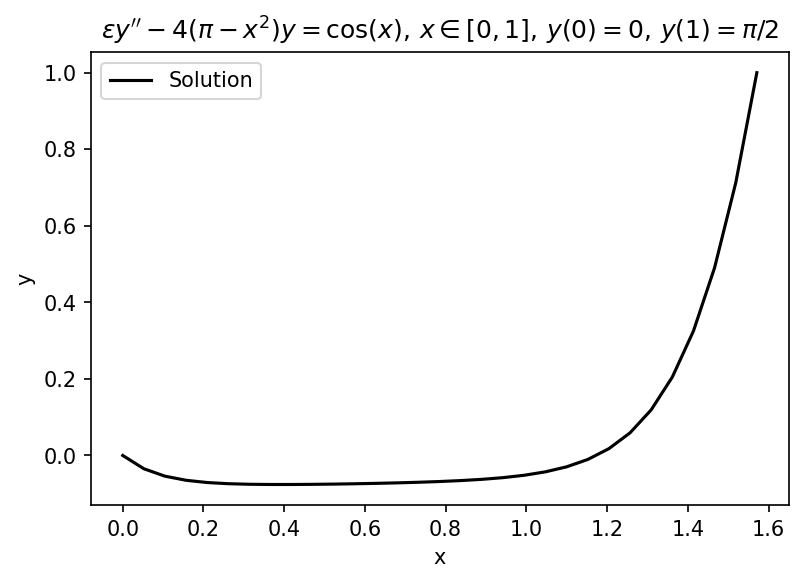

In [7]:
def prob4():
  #set the desired values
  eps = 1/10.
  f = lambda x: np.cos(x)
  a1 = lambda x: eps*x**0.0
  a2 = lambda x: 0*x
  a3 = lambda x: -4*(np.pi  - x**2)
  a = 0 
  b = np.pi/2
  alpha = 0
  beta = 1
  n = 30
  #numerically solve
  x_vals, u_vals = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
  #plot
  fig = plt.figure()
  fig.set_dpi(150)
  ax = fig.add_subplot(111)
  ax.plot(x_vals, u_vals, 'k-', label='Solution')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend(loc='best')
  ax.set_title(r"$\varepsilon y'' - 4(\pi -x^2)y = \cos(x), \, x\in[0, 1], \, y(0) =0,\, y(1) =\pi /2$")
  plt.show()
  return

prob4()

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) + xy'(x) = -\epsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\epsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals. Plot your solutions.

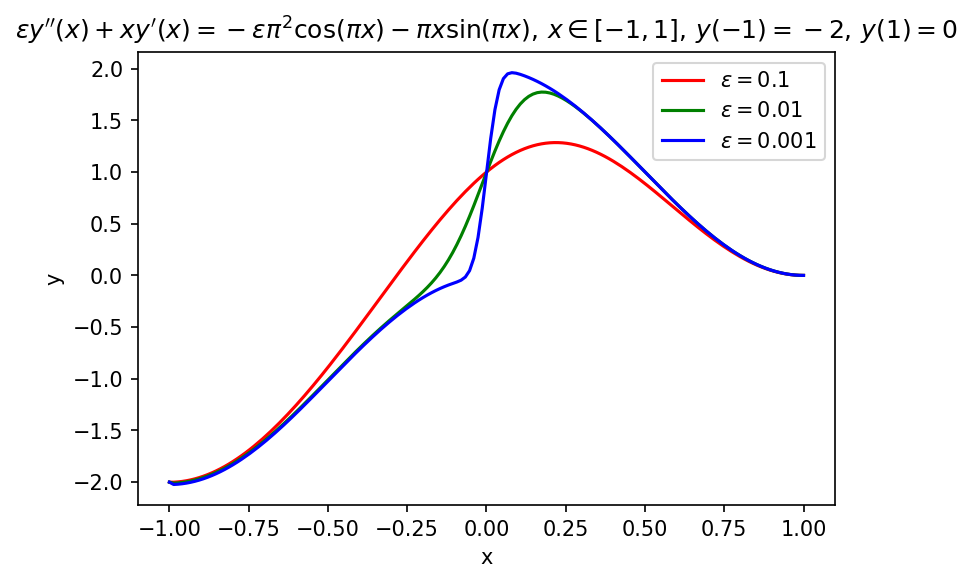

In [8]:
def prob5():
  eps_vals = [0.1, 0.01, 0.001]
  color = ['r-','g-', 'b-']
  fig = plt.figure()
  fig.set_dpi(150)
  ax = fig.add_subplot(111)
  for i, eps in enumerate(eps_vals):
    #set the desired values
    f = lambda x: -eps*np.pi**2*np.cos(np.pi*x) - np.pi*x*np.sin(np.pi*x)
    a1 = lambda x: eps*x**0.0
    a2 = lambda x: x
    a3 = lambda x: 0*x
    a = -1 
    b = 1
    alpha = -2
    beta = 0
    n = 150
    #numerically solve
    x_vals, u_vals = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
    #plot
    ax.plot(x_vals, u_vals, color[i], label=r"$\varepsilon = $" + str(eps))
    ax.legend(loc='best')

  #set labels 
  ax.set_title(r"$\varepsilon y''(x) + xy'(x) = -\varepsilon \pi^2\cos(\pi x) - \pi x\sin(\pi x), \,x\in[-1, 1],\, y(-1)=-2,\, y(1)=0 $")
  ax.set_xlabel('x') 
  ax.set_ylabel('y')
  plt.show()
  return

prob5()

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\varepsilon +x^2)y''(x) + 4xy'(x) + 2y(x) = 0, \\
	y(-1) = 1/(1+\varepsilon), \quad y(1) = 1/(1+\varepsilon),
\end{align*}

for $\epsilon = 0.05$ and $0.02$. Use a grid with $n=150$ subintervals. Plot your solutions.

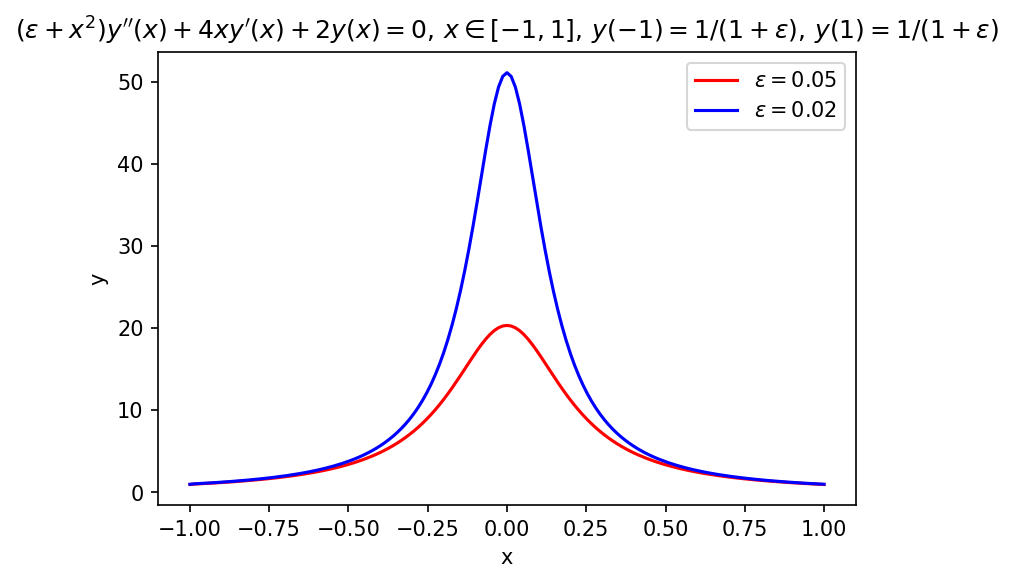

In [9]:
def prob6():
  eps_vals = [0.05, 0.02]
  color = ['r-','b-']
  fig = plt.figure()
  fig.set_dpi(150)
  ax = fig.add_subplot(111)
  for i, eps in enumerate(eps_vals):
    #set the desired values
    f = lambda x: 0 * x
    a1 = lambda x: eps + x**2
    a2 = lambda x: 4*x
    a3 = lambda x: 2*x**0.0
    a = -1 
    b = 1
    alpha = 1/(1 + eps)
    beta = 1/(1 + eps )
    n = 150
    #numerically solve
    x_vals, u_vals = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
    #plot
    ax.plot(x_vals, u_vals, color[i], label=r"$\varepsilon = $" + str(eps))
    ax.legend(loc='best')

  #set labels 
  ax.set_title(r"$(\varepsilon +x^2)y''(x) + 4xy'(x) + 2y(x) = 0,\, x\in[-1, 1], \, y(-1) = 1/(1 + \varepsilon),\, y(1) = 1/(1 +\varepsilon)$")
  ax.set_xlabel('x') 
  ax.set_ylabel('y')
  plt.show()

  return
prob6()